In [76]:
import numpy as np
from matplotlib.pyplot import * 
from math import sqrt, pi,cos
import numba
import scipy.signal
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
@numba.jit(nopython=True)
def colored_noise_euler_integration(x_0, tau, c, D, dt=0.001, t_stop=101):
    """
    Use Euler integration to solve ODEs
    """    
    mu=np.exp(-dt/tau)
    sigma= sqrt( ((c * tau)/2) * (1-mu**2) )
    
    # Time points
    t = np.linspace(0, t_stop, int(t_stop/dt))
    
    # Initialize output array
    x = x_0 * np.ones_like(t)
    
    for i in range(0, len(t) - 1):
        x[i+1] = x[i]* mu + sigma * np.random.normal()
        
    return t, x

In [80]:
#@numba.jit(nopython=True)
def colored_noise_euler_integration_fox(x_0, lamda, D, dt=0.001, t_stop=101):
    """
    Use Euler integration to solve ODEs
    """    
    E=np.exp(-lamda * dt)
    
    # Time points
    t = np.linspace(0, t_stop, int(t_stop/dt))
    
    # Initialize output array
    x = x_0 * np.ones_like(t)
    
    for i in range(0, len(t) - 1):
        a=np.random.uniform()
        b=np.random.uniform()
        x[i+1] = x[i]* E + sqrt(-2*D*lamda*(1-E**2)*np.log(a))*cos(2*pi*b)
        
    return t, x

In [114]:
# Specify parameters
x_0 = 1
tau = 100
c=1
dt=0.001
D=100
lamda=0.00001
t_stop=100

In [ ]:
##GILLESPIE

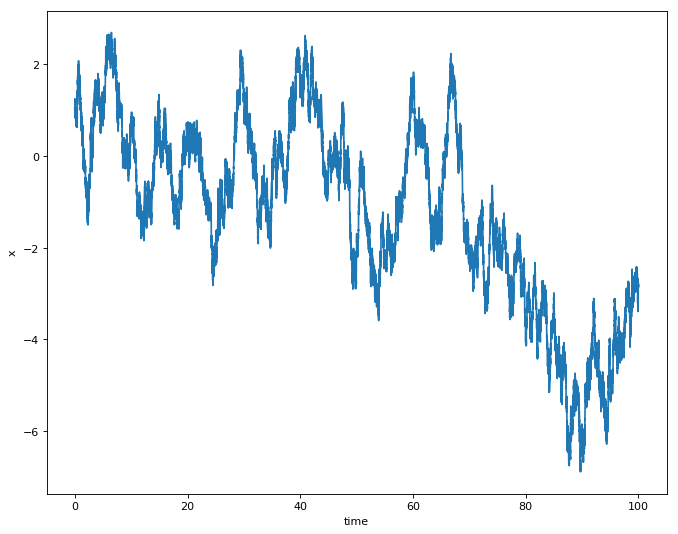

In [117]:
# Perform the solution
t, x = colored_noise_euler_integration(x_0, tau, c, D, dt, t_stop)

# Plot the result
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plot(t, x)
xlabel('time')
ylabel('x')
show()

In [ ]:
##FOX

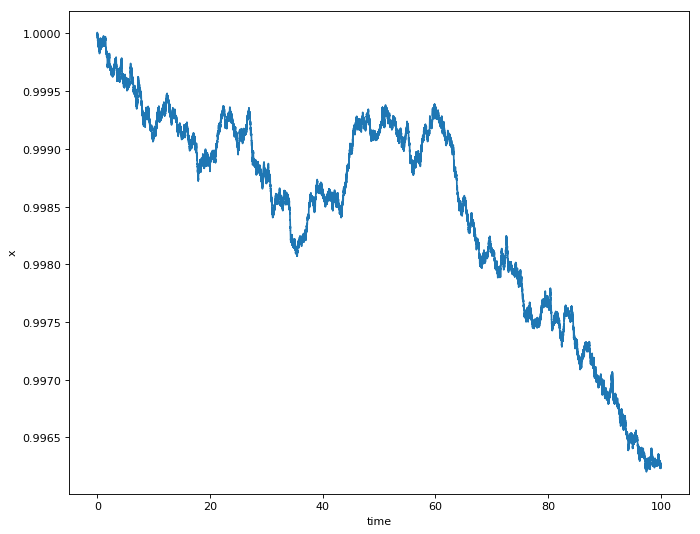

In [116]:
# Perform the solution
t, x = colored_noise_euler_integration_fox(x_0, lamda,D, dt, t_stop)

# Plot the result
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plot(t, x)
xlabel('time')
ylabel('x')
show()

In [ ]:
## AUTOCORRELATION

In [107]:
def autocorrelation(x):
    result = scipy.signal.correlate(x, x, mode='full')
    result=result[int(result.size/2):]
    return result/result[0]

In [39]:
def autocorr_function(f):
    temp = np.correlate(f, f, mode='full')
    mid =temp.size/2
    return temp[int(mid):]/temp[int(mid):]

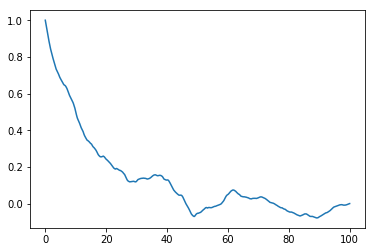

In [118]:
#1
autocorr=autocorrelation(x)
plot(t,autocorr)
show()

In [ ]:
#2
autocorr=autocorr_function(x)
plot(t,autocorr)
show()

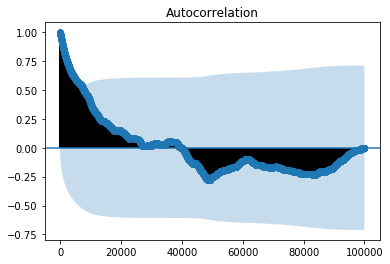

In [119]:
#3
plot_acf(x)
show()

In [11]:
#4
iact=[]
timeseries = x
mean = np.mean(timeseries)
timeseries -= np.mean(timeseries)
autocorr_f = np.correlate(timeseries, timeseries, mode='full')
temp = autocorr_f[int(autocorr_f.size/2):]/autocorr_f[int(autocorr_f.size/2)]
iact.append(sum(autocorr_f[int(autocorr_f.size/2):]/autocorr_f[int(autocorr_f.size/2)]))